# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


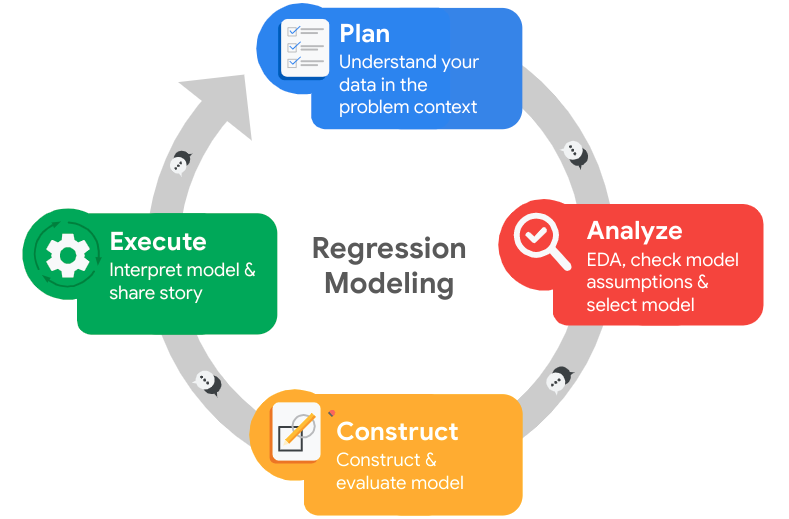

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Question: Who are your stakeholders for this project?
Answer: The primary stakeholders for this project are the HR Department at Salifort Motors and senior leadership. Future employers are also external stakeholders for the executive summary deliverable.]

[Question: What are you trying to solve or accomplish?
Answer: The project aims to address high employee turnover, which is costly and impacts company culture. The goals are to analyze the provided data, build a predictive model for turnover, identify key driving factors, and provide data-driven recommendations to improve retention.]

[Question: What are your initial observations when you explore the data?
Answer: Based on the dataset description, initial observations include the dataset's size and structure (15,000 rows, 10 columns), the potential for class imbalance in the target variable (left), likely key predictors (e.g., satisfaction level, time spent company, salary), the mix of numerical and categorical data types, and the need to check for missing values or outliers.]

[Question: What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
Answer: Resources for the Plan stage would include the project description and requirements, information on HR analytics and turnover prediction, dataset documentation (Kaggle source), overviews of potential models (Logistic Regression, Decision Trees, etc.), and resources on ethical considerations for HR data.]

[Question: Do you have any ethical considerations in this stage?
Answer: Yes, ethical considerations are important in the planning stage. These include data privacy and security, potential biases in the data and models, transparency in communicating results, using data only for the stated purpose, and compliance with data regulations.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [3]:
# Import packages
### YOUR CODE HERE ### 
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
### YOUR CODE HERE ### 
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
### YOUR CODE HERE ### 
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

np.int64(3008)

In [11]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')


# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

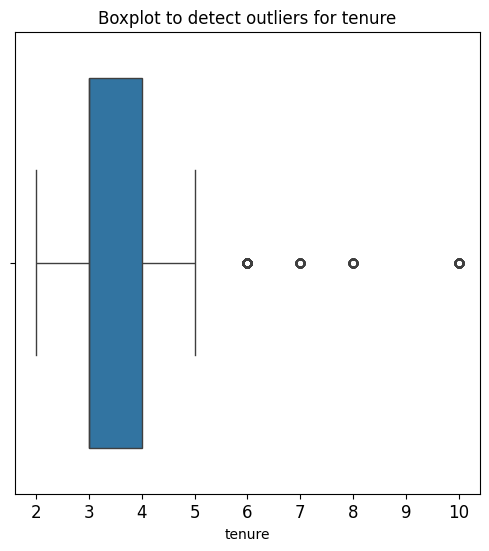

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()


### Tenure Distribution and Outlier Analysis

The boxplot above visualizes the distribution of employee `tenure` in years.

**Observations:**

* **Central Tendency & Spread:** The majority of employees appear to have a tenure between approximately 3 to 4 years, which represents the interquartile range (IQR – the box in the plot). The median tenure lies within this range.
* **Skewness:** The distribution appears to be right-skewed, with the upper whisker extending further than the lower whisker, and several points identified beyond the upper whisker.
* **Outliers:** The boxplot highlights several potential outliers on the higher end of the tenure scale. Specifically, there are data points indicating employees with tenures of:
    * 7 years
    * 8 years
    * 10 years

These points are identified as outliers because they fall beyond 1.5 times the IQR from the upper quartile. These longer tenures are significantly different from the bulk of the employees.

**Next Steps:**
The presence of these outliers warrants further investigation. The following steps will involve quantitatively determining the number of employees considered outliers based on the IQR method.

In [14]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# Pace: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**What did you observe about the relationships between variables?**


[Through visualizations like the boxplots and scatterplots, we observed strong relationships between employee turnover and factors such as the number of projects, average monthly hours, satisfaction level, tenure, and promotion status. We saw that employees with very low satisfaction, those with very high monthly hours and projects (especially 6 or 7 projects), and those with 6+ years of tenure were highly likely to leave. The scatterplots highlighted distinct clusters of leavers based on combinations of hours, satisfaction, and evaluation, indicating non-linear interactions. The promotion scatterplot clearly showed that receiving a promotion significantly reduces the likelihood of leaving across varying hours.]

**What do you observe about the distributions in the data?**

[From checking info() and isna(), we observed that the dataset has 14,999 entries with no missing values. describe() provided summary statistics for numerical variables, showing ranges and central tendencies. The distribution of the target variable left showed a class imbalance, with about 16.6% of employees having left. Visualizations further revealed distributions like the concentration of employees at 3-5 projects and specific tenure years (2-5), while also highlighting outliers in tenure (6, 7, 8, 10 years) and clusters in hours/satisfaction/evaluation that correspond to employee turnover. Department counts showed the largest departments are Sales, Technical, and Support.]

**What transformations did you make with your data? Why did you chose to make those decisions**

[A key transformation performed was dropping 3008 duplicate rows using drop_duplicates(keep='first'). This was done to ensure each employee record is unique, preventing skewed analysis and model training results from redundant data. We also identified outliers in the tenure column using the IQR method and visualizing with a boxplot. While no specific transformation was applied to handle these outliers yet, the decision to identify them was made because certain models are sensitive to outliers, and understanding their presence is a necessary step before model construction.]

**What are some purposes of EDA before constructing a predictive model?**

[The purposes of EDA were clearly demonstrated in our process: it allowed us to understand the dataset's structure, variable types, and identify data quality issues like duplicates (which we then cleaned). EDA helped us discover patterns and relationships between features and the target variable through visualizations, providing insights into the drivers of turnover (e.g., impact of satisfaction, hours, projects, tenure, promotion). Understanding distributions and relationships informs feature selection, potential feature engineering ideas, helps assess the need for data transformations (like handling outliers or preparing for categorical encoding), and guides the choice of appropriate predictive models based on data characteristics.]

**What resources do you find yourself using as you complete this stage?**

[During the Analyze stage, resources extensively used included the documentation for the Python libraries Pandas (for data loading, cleaning, manipulation, and basic statistics like info(), describe(), value_counts(), duplicated(), drop_duplicates(), groupby(), agg(), quantile()), NumPy (for statistical aggregations), Matplotlib (for plotting basics), and Seaborn (for creating enhanced statistical visualizations like boxplots, histograms, scatterplots, and heatmaps). Online resources like Stack Overflow were also valuable for troubleshooting code or understanding specific function parameters.]

**Do you have any ethical considerations in this stage?**

During the Analyze stage, a primary ethical consideration was to ensure that all interpretations of data patterns and variable relationships related to employee turnover were made objectively, minimizing personal bias and focusing strictly on data-driven evidence. It was also crucial to consider that any insights derived, such as factors correlating with employees leaving, should be used constructively to inform fair and supportive retention strategies, rather than leading to an unfair profiling of individuals. The goal was to use the analysis to understand systemic issues and improve the overall work environment, while being mindful of employee privacy and the potential impact of the findings.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###

print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###

print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

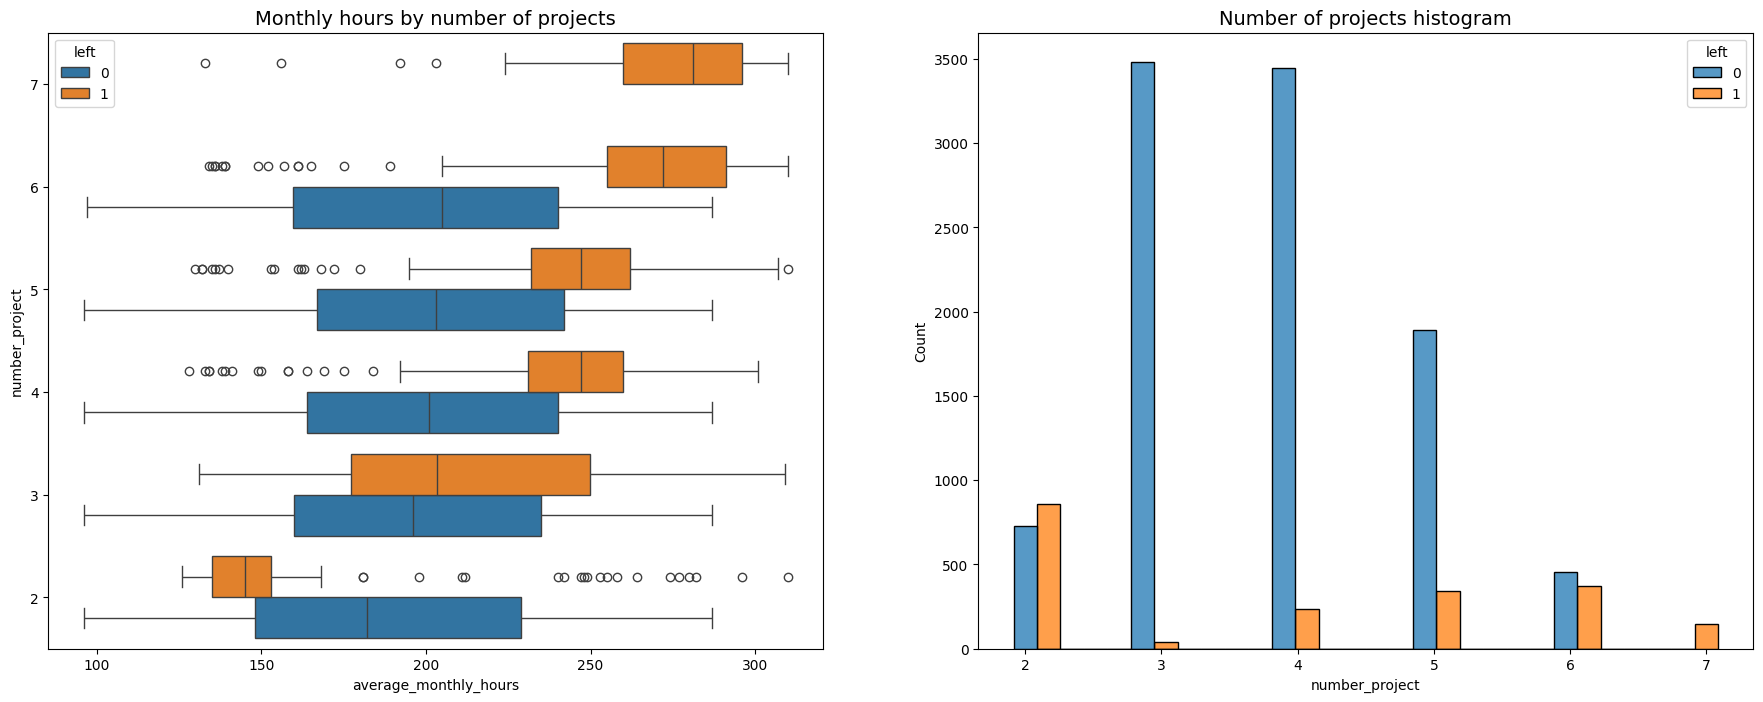

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

### Analysis of Project Load, Monthly Hours, and Employee Turnover

The visualizations above explore the relationship between the number of projects an employee handles, their average monthly hours, and their decision to leave the company.

**Key Observations:**

1.  **Distribution of Projects (`Number of projects histogram`):**
    * The majority of employees handle between 3 to 5 projects.
    * A significant pattern emerges at the extremes:
        * Employees with 2 projects show a notable number of leavers.
        * Employees undertaking 6 projects have a very high proportion of leavers compared to stayers.
        * Almost all employees who take on 7 projects end up leaving the company.

2.  **Monthly Hours by Number of Projects (`Monthly hours by number of projects` boxplot):**
    This plot reveals distinct patterns in working hours for employees who left versus those who stayed, depending on their project load:
    * **2 Projects:** Employees who left tend to work significantly *fewer* average monthly hours compared to those who stayed. This might indicate disengagement or underutilization.
    * **3-5 Projects:**
        * For employees with 3 projects, those who left show a wide variation in hours, some working less and some more than those who stayed.
        * For 4 and 5 projects, employees who left generally worked *similar or slightly more* average monthly hours than those who stayed. The distributions of hours for leavers are often wider.
    * **6 Projects:** Employees who left worked substantially *more* average monthly hours than those who stayed, pointing towards potential overwork.
    * **7 Projects:** The few employees (almost exclusively leavers) in this category also worked very high average monthly hours, reinforcing the overwork hypothesis for this segment.

**Combined Insights:**

These plots suggest at least three distinct groups of employees prone to leaving:

* **Underutilized/Disengaged:** Employees with a low project count (e.g., 2 projects) and notably low working hours.
* **Overworked:** Employees with a high project count (6 or 7 projects) and very high working hours. This segment has an extremely high attrition rate.
* **Mid-Range Burnout/Mismatch:** Employees with 3-5 projects who leave might be driven by a combination of factors, including moderately high hours for some, or perhaps other reasons not solely captured by hours and project count (e.g., dissatisfaction, lack of growth, evaluation scores).

Understanding these segments can help tailor retention strategies. For instance, addressing potential disengagement for those with low project counts and managing workload for those with high project counts could be critical.

In [17]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

Text(0.5, 1.0, 'Average Monthly Hours vs. Satisfaction Level (by Employee Turnover Status)')

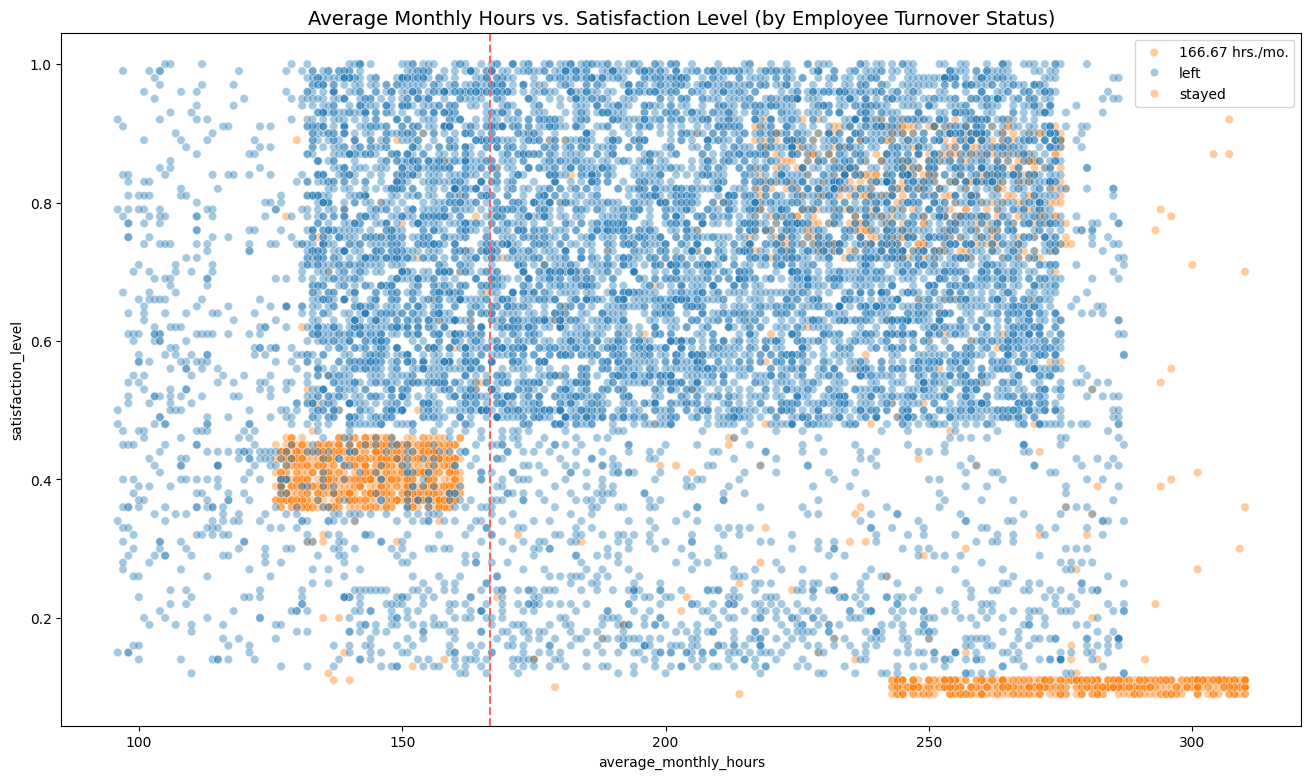

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Average Monthly Hours vs. Satisfaction Level (by Employee Turnover Status)', fontsize='14')

### Satisfaction Level vs. Average Monthly Hours by Turnover Status

The scatterplot above illustrates the relationship between employees' average monthly hours and their reported satisfaction levels, with points colored based on whether they left the company or stayed.

**Key Observations:**

* **Employees Who Stayed (`left=0`, blue points):**
    * These employees are distributed across a wide range of satisfaction levels and average monthly hours.
    * A large concentration of stayers appears to have mid to high satisfaction levels (roughly > 0.5) across various working hours, but generally avoiding the extreme ends of the hours spectrum paired with very low satisfaction.

* **Employees Who Left (`left=1`, orange points):**
    The most striking feature is the formation of three distinct clusters for employees who left:
    1.  **Low Satisfaction, Low-to-Moderate Hours:** A group of employees with very low satisfaction levels (approximately 0.1 to 0.2) and working fewer to average hours (around 125-175 hours/month). These might be disengaged or unhappy employees who are not necessarily overworked.
    2.  **Mid-Low Satisfaction, High Hours:** Employees with low to moderate satisfaction levels (approximately 0.35 to 0.5) but working significantly high average monthly hours (around 220-280

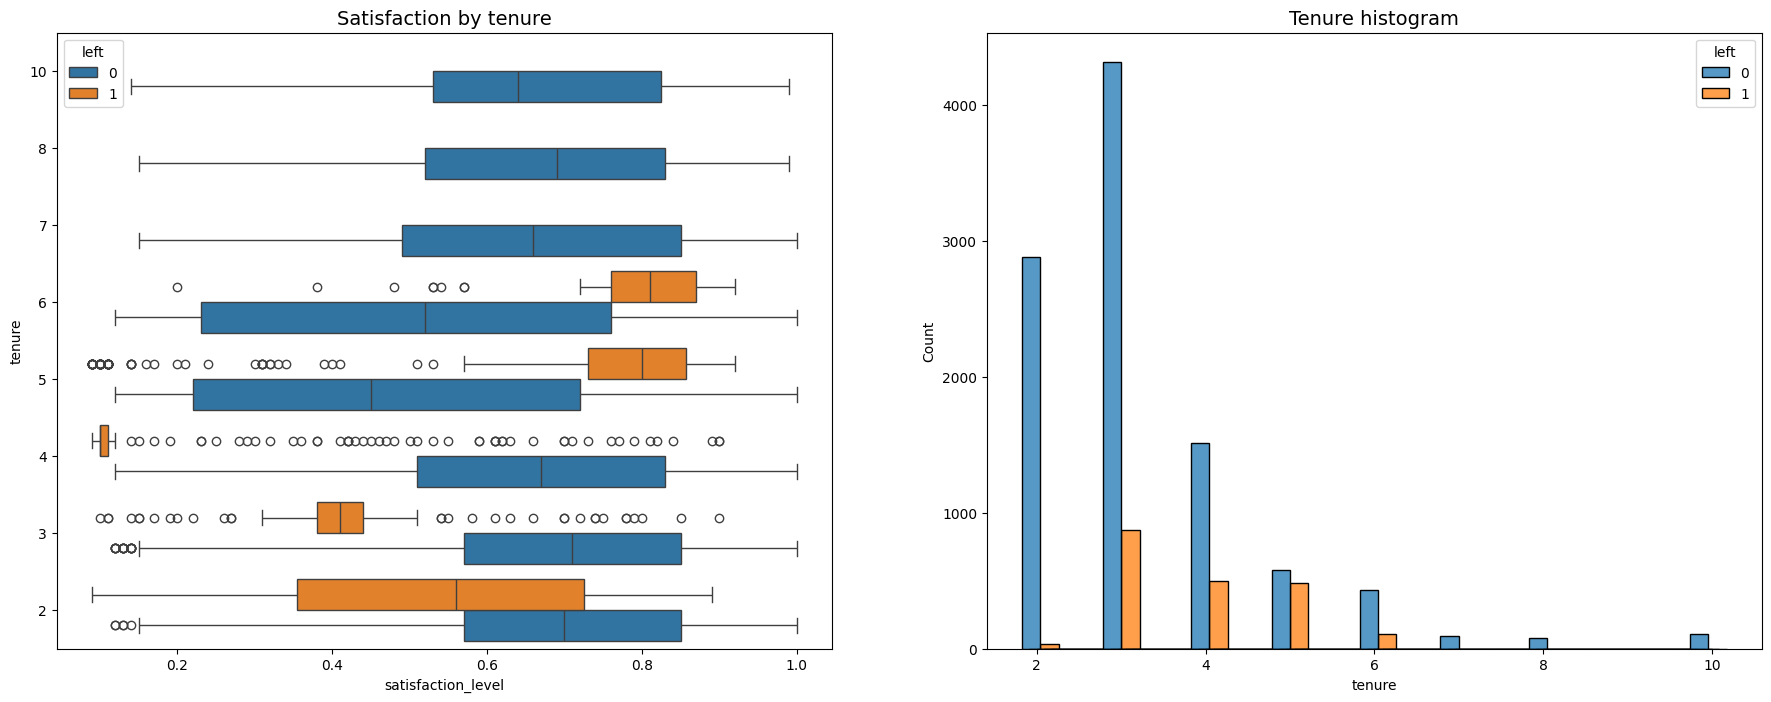

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();


### Employee Tenure, Satisfaction, and Turnover Analysis

The visualizations above explore the relationship between employee tenure, their satisfaction levels, and the likelihood of leaving the company.

**Key Observations:**

1.  **Tenure Distribution and Turnover Rates (`Tenure histogram`):**
    * The highest number of employees who stay with the company are those with 3 years of tenure.
    * There's a notable number of employees leaving after 2 years.
    * The number of employees leaving increases at the 4 and 5-year tenure marks.
    * A critical point appears at **6 years of tenure**, where the number of employees staying significantly drops, while a substantial number of those with 6 years of tenure leave, resulting in a high turnover proportion for this group.
    * **At 7 years of tenure, nearly all employees leave** the company.
    * Longer tenures (8+ years) are rare and predominantly consist of employees who eventually leave; these were previously identified as outliers.

2.  **Satisfaction Levels by Tenure (`Satisfaction by tenure` boxplot):**
    This plot reveals how satisfaction levels differ between employees who stayed and those who left, across various tenure lengths:
    * **2-3 Years Tenure:** Employees who leave generally exhibit a wider range of satisfaction levels, often skewed lower compared to those who stay. Stayers at these tenures tend to maintain relatively moderate to high satisfaction.
    * **4-5 Years Tenure:** A distinct pattern emerges for leavers. Many employees leaving at the 4 and 5-year marks show very low satisfaction levels (around 0.1-0.2). However, there's also a subgroup of leavers at these tenures with moderate to even high satisfaction, suggesting multiple underlying reasons for departure. Employees who stay during these years generally maintain higher satisfaction.
    * **6 Years Tenure:** Employees who leave at the 6-year mark predominantly show low satisfaction levels. The few remaining employees who stay also exhibit a broader and somewhat lower satisfaction distribution compared to stayers at earlier tenures.
    * **7+ Years Tenure:** For the few employees with 7 or more years of tenure (who are almost all leavers), satisfaction levels are generally low to moderate.

**Combined Insights:**

* **Critical Tenure Milestones:** The 4 to 6-year tenure period appears to be a critical window for employee retention. Turnover increases significantly, and satisfaction profiles for leavers become more complex (especially at 4-5 years) or predominantly low (at 6 years).
* **Satisfaction as a Key Factor:** Lower satisfaction is consistently associated with a higher likelihood of leaving across most tenure groups. However, the bimodal satisfaction distribution for leavers at 4-5 years suggests that while low satisfaction is a major driver, some employees might leave despite acceptable satisfaction, possibly due to reasons like lack of growth, better opportunities, or other unobserved factors.
* **Long-Tenured Employees:** The data indicates a challenge in retaining employees beyond 5-6 years, with very high attrition and generally lower satisfaction among those who leave at these later stages.

These insights suggest that retention strategies should not only focus on overall satisfaction but also be mindful of tenure-specific challenges and satisfaction dynamics.

In [20]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
# using string aliases for aggregation functions to avoid FutureWarning
satisfaction_summary = df1.groupby(['left'])['satisfaction_level'].agg(['mean', 'median'])

# Display the result
print(satisfaction_summary)

          mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41


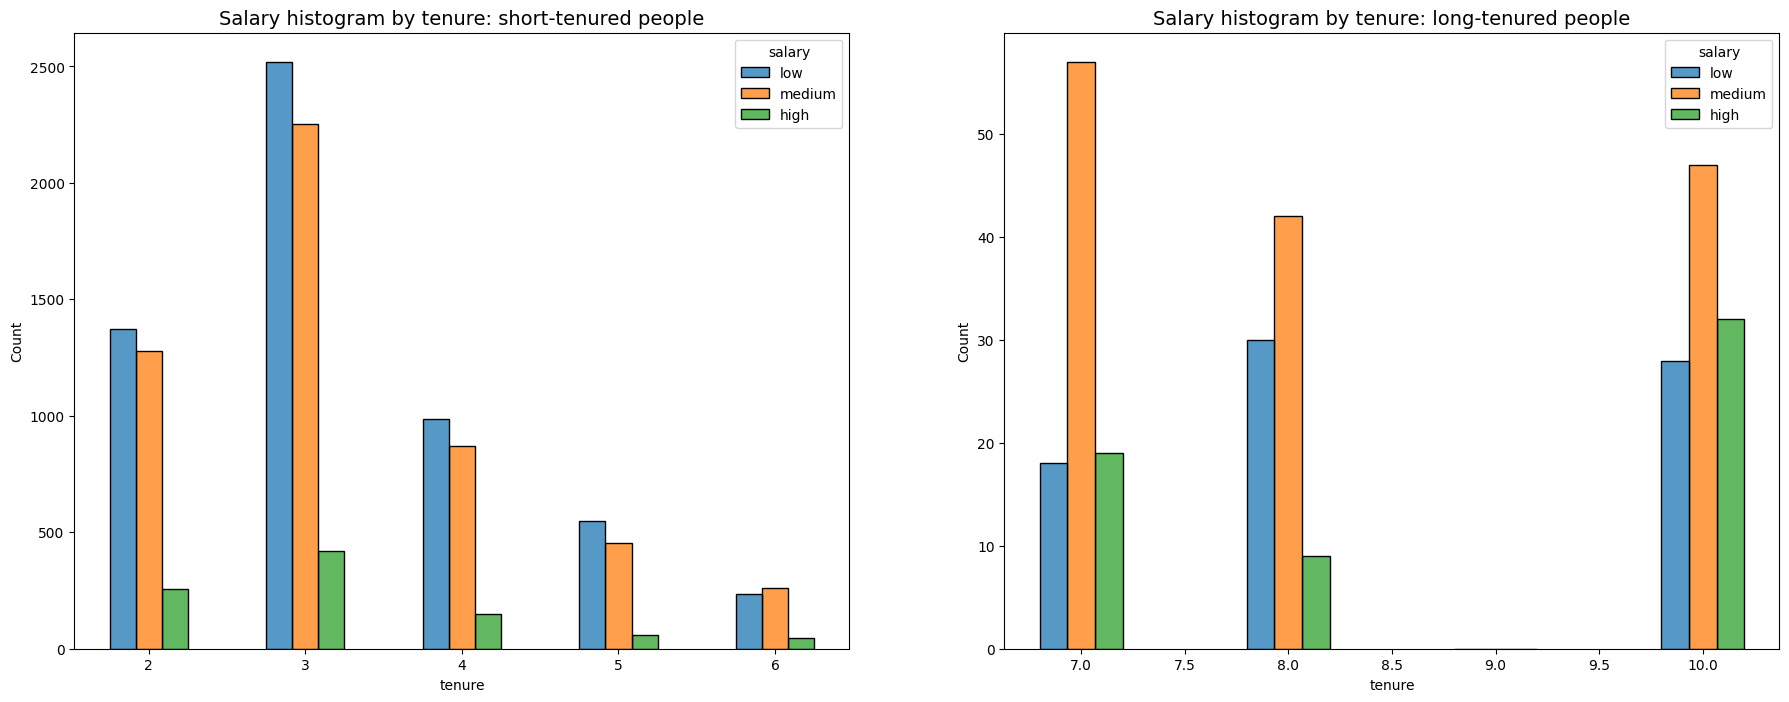

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

### Salary Distribution by Employee Tenure: Short-Term vs. Long-Term Employees

The histograms above segment employees into two groups—those with less than 7 years of tenure (short-tenured) and those with more than 6 years of tenure (long-tenured)—to examine how salary levels (low, medium, high) are distributed across different tenure years within these groups.

**Key Observations:**

1.  **Short-Tenured Employees (Tenure < 7 years):**
    * Across all short tenures (2 to 6 years), employees with "low" and "medium" salaries are consistently more numerous than those with "high" salaries.
    * The largest cohorts of employees are found at 2 and 3 years of tenure, with "low" and "medium" salary categories being the most populated.
    * As tenure increases from 3 to 6 years, the overall number of employees in each category (low, medium, high salary) tends to decrease, but the general pattern of fewer high-salaried employees persists.

2.  **Long-Tenured Employees (Tenure > 6 years):**
    * This group (tenures of 7, 8, and 10 years displayed) has significantly fewer employees compared to the short-tenured group, which aligns with previous findings of increased turnover at longer tenures.
    * **At 7 years of tenure** (a point previously identified with very high turnover), employees with "low" salaries are the most common, followed by "medium," and then "high."
    * For tenures of **8 and 10 years**, the number of employees is very small, making it harder to draw strong conclusions about salary distribution. However, all three salary levels appear to be present. For the 10-year mark, "medium" salary seems to be slightly more represented among the few individuals.

**Combined Insights & Potential Implications:**

* **Predominance of Lower Salaries:** For the majority of employees, especially those in the high-count, shorter tenure years (2-6 years), low and medium salaries are the norm. High salaries are relatively uncommon across all observed tenures.
* **Salary and Long-Term Attrition:** The high turnover observed around the 7-year mark predominantly involves employees in low and medium salary brackets. While this data alone doesn't confirm causality, it could suggest that compensation might be a factor for long-serving employees, or that progression to higher salary brackets is limited for many who stay that long.
* Further analysis could explore if employees who leave at these longer tenures (despite their tenure) are in lower salary brackets compared to the few who might stay or have similar roles elsewhere.

These visualizations provide a useful breakdown of salary composition across tenure, offering another dimension to consider when analyzing retention and employee progression.

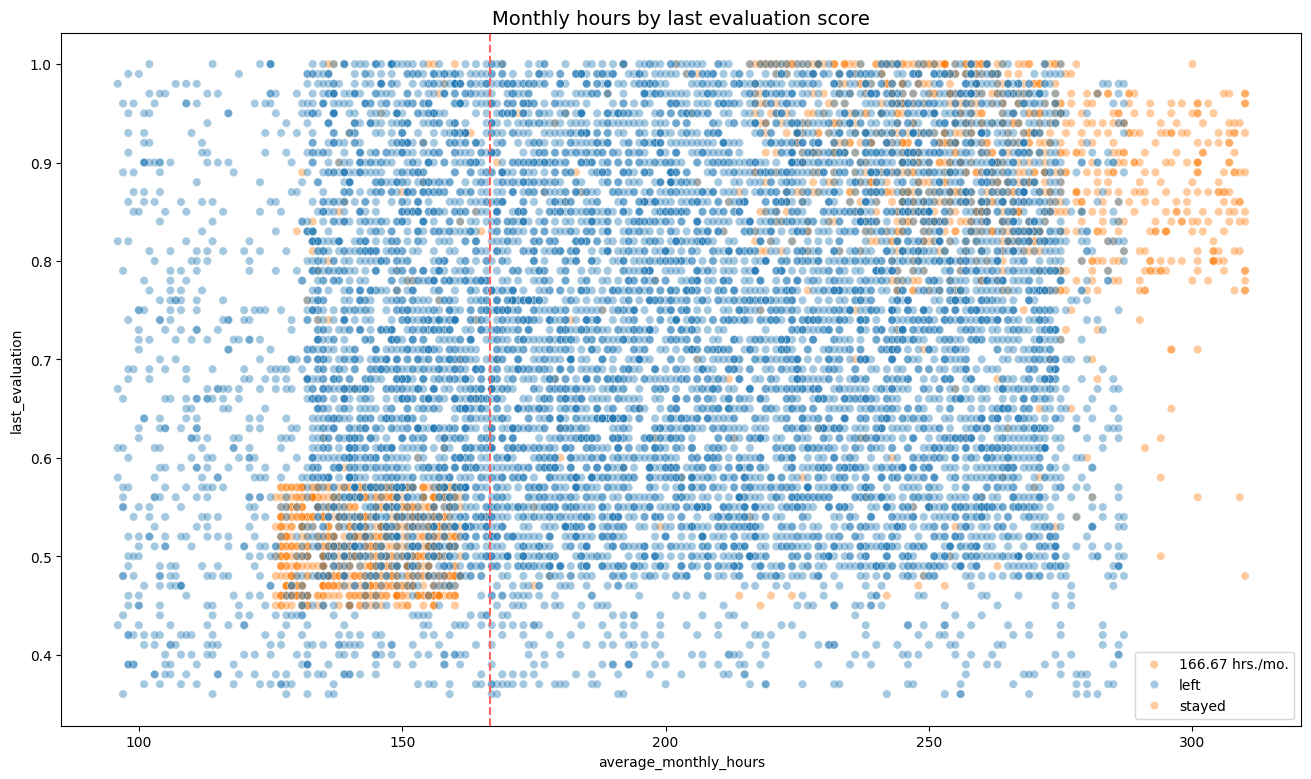

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

### Last Evaluation Score vs. Average Monthly Hours by Turnover Status

This scatterplot examines the relationship between employees' average monthly hours and their last performance evaluation scores, with data points differentiated by whether they left the company or stayed.

**Key Observations:**

* **Employees Who Stayed (`left=0`, blue points):**
    * Employees who remained with the company are broadly distributed across various combinations of evaluation scores and working hours.
    * A significant portion of stayers tends to have evaluation scores ranging from moderate to high (approximately 0.55 to over 0.9) and are spread across a wide spectrum of hours, generally avoiding the distinct clusters where leavers are concentrated.

* **Employees Who Left (`left=1`, orange points):**
    Similar to previous scatterplots involving hours, employees who left form noticeable clusters:
    1.  **Low-to-Mid Evaluation, Low-to-Moderate Hours:** This group consists of employees with relatively low to middling performance evaluation scores (roughly 0.45 to 0.6) who also worked fewer to average hours (around 125-175 hours/month). These individuals might have been underperformers or disengaged from their work.
    2.  **High Evaluation, Very High Hours:** A distinct cluster of leavers includes employees who received high evaluation scores (approximately 0.75 to 1.0) but were also working extremely long average monthly hours (around 220-310+ hours/month). This pattern suggests that high-performing employees may be leaving due to burnout from excessive workload.
    3.  **Mid-Range Evaluation, Very High Hours:** Another segment of leavers had more moderate evaluation scores (around 0.6 to 0.75) but also experienced very high working hours. This, combined with the previous cluster, indicates a strong trend of employees across different performance levels leaving when subjected to consistently high hours.

* **Impact of Hours (relative to the 166.67 hrs/month line):**
    * The first cluster of leavers (lower evaluation scores) is primarily located around or below the 166.67 hours/month reference line.
    * The other prominent clusters of leavers (those with mid to high evaluation scores) are almost exclusively found well above this line, highlighting the association between high working hours and attrition for these groups.

**Implications:**
The patterns suggest that employee turnover isn't driven by a single profile. Some employees leave who appear to be lower performers working fewer hours. However, a very significant group of leavers consists of employees who are rated from average to excellent performers but are working unsustainable hours. This underscores the importance of managing workload and preventing burnout, even for top talent, as a key retention strategy.

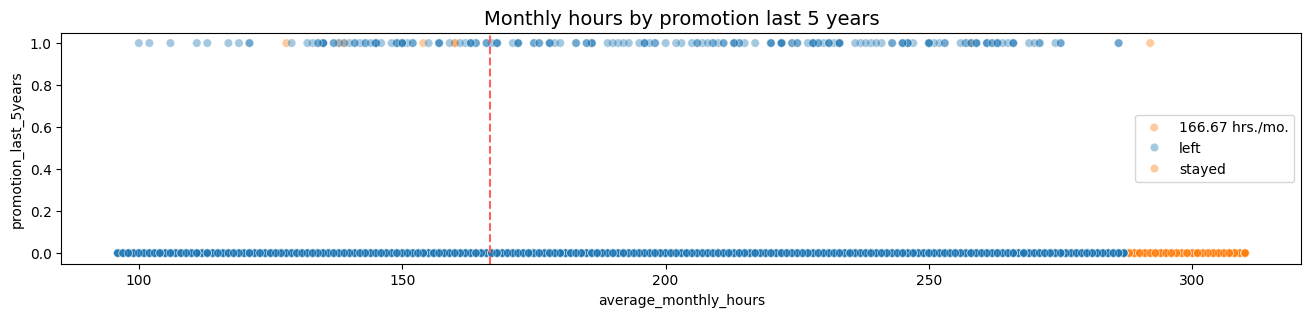

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

### Impact of Promotions and Working Hours on Employee Turnover

This scatterplot investigates the relationship between employees' average monthly working hours, whether they received a promotion in the last five years, and their decision to stay with or leave the company.

**Key Observations:**

* **Vast Majority Not Promoted (Points at `promotion_last_5years = 0`):**
    * The overwhelming majority of employees fall into the category of not having received a promotion in the last five years.
    * Within this group, both employees who stayed (typically shown as blue points) and those who left (typically shown as orange points) are present.
    * Many employees who left from this non-promoted group can be seen working high `average_monthly_hours`, often well above the 166.67 hours/month reference line. This aligns with previous findings where high workload was associated with attrition.

* **Promoted Employees Show High Retention (Points at `promotion_last_5years = 1`):**
    * A very small percentage of employees received a promotion in the last five years, as indicated by the sparse distribution of points along the `y=1` line.
    * **Crucially, almost all employees who received a promotion stayed with the company.** The points at `y=1` are predominantly for stayers, with extremely few, if any, leavers visible in this group.
    * The average monthly hours for these promoted employees (who largely stayed) are spread across a range and do not show the same concentration at very high levels as seen among many leavers in the non-promoted group.

**Implications:**

* **Strong Positive Impact of Promotions:** Receiving a promotion appears to be a very strong factor in employee retention. Employees who are promoted are highly unlikely to leave, at least within the timeframe captured by this data.
* **Retention Strategies:** This highlights the significant role that career advancement and recognition (in the form of promotions) can play in retaining employees. While promotions are infrequent in this dataset, their impact on loyalty is stark. For the larger group of non-promoted employees, managing factors like working hours remains critical in mitigating turnover.

This visualization powerfully underscores the retention benefits associated with employee promotions.

In [24]:
# Display counts for each department
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 45

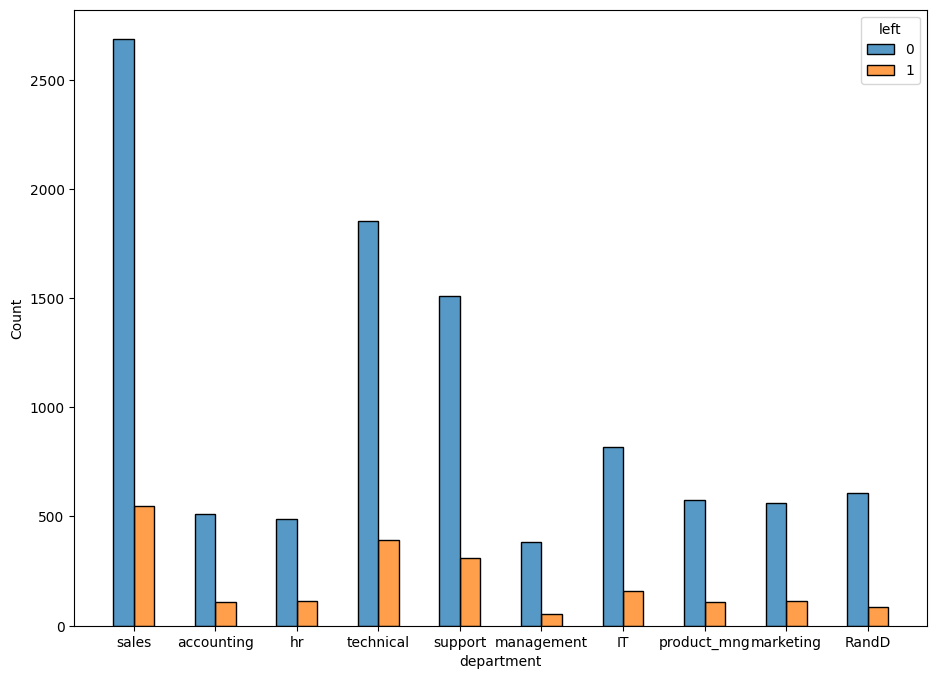

In [25]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

### Employee Turnover Distribution by Department

The bar chart above displays the distribution of employees who stayed versus those who left across various departments within the company. Each department shows two bars: one for the count of employees who remained and one for the count of those who departed.

**Key Observations:**

* **Overall Department Sizes:** Departments such as "sales," "technical," and "support" are visibly the largest in terms of total employee count, as indicated by the combined height of their "stayed" and "left" bars. Other departments like "management," "hr," and "RandD" have comparatively fewer employees.

* **Stayers vs. Leavers:**
    * Across all departments, the bar representing employees who stayed is substantially taller than the bar representing employees who left. This is consistent with the overall employee turnover rate being less than 50%.
    * The **highest absolute numbers of employees leaving** originate from the largest departments (likely "sales," "technical," and "support"), which is expected given their larger employee base.

* **Departmental Turnover Insights (Interpreted from relative bar heights):**
    * While larger departments contribute more to the total number of leavers, it's important to visually compare the height of the "left" bar relative to the "stayed" bar *within each department* to get a sense of proportional turnover.
    * For instance, some smaller departments might show a "left" bar that is a more significant fraction of its "stayed" bar, potentially indicating a higher turnover *rate* for that specific department, even if the absolute number of leavers is smaller than in larger departments. (This would need to be confirmed with percentage calculations if not visually obvious).
    * Conversely, some large departments might have many leavers in absolute terms, but their turnover *rate* (leavers as a percentage of that department's total staff) might be average or even below average for the company.

**Implications:**

* This visualization helps identify which departments contribute most to the overall number of employees leaving.
* It also allows for a preliminary visual assessment of whether certain departments might be experiencing disproportionately high turnover rates, warranting further investigation into department-specific factors (e.g., management, work environment, role types).

To get a more precise understanding of turnover *rates* per department, calculating the percentage of leavers within each department would be a valuable next step.

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Correlation Heatmap of Key Numerical Features

This heatmap visualizes the pairwise linear correlations among a selected subset of key numerical features: `satisfaction_level`, `last_evaluation`, `number_project`, `average_monthly_hours`, and `tenure`. The values in each cell represent the correlation coefficient between the respective pair of variables, with the color intensity indicating the strength and direction of this linear relationship.

**Anticipated Observations (based on typical HR data patterns):**

* **`number_project` vs. `average_monthly_hours`**: A **moderate positive correlation** is expected here (e.g., values like 0.3 to 0.5). Generally, as the number of projects an employee is involved in increases, their average monthly working hours are also likely to increase.
* **`number_project` vs. `last_evaluation`**: It's common to see a **weak to moderate positive correlation** (e.g., 0.1 to 0.3). Employees handling more projects might be perceived as taking on more responsibility or having higher output, potentially leading to slightly better evaluation scores.
* **`average_monthly_hours` vs. `last_evaluation`**: Similar to the above, a **weak to moderate positive correlation** might be present. Higher hours could sometimes be associated with effort or project completion, influencing evaluations, though this isn't always a strong or direct link.
* **`satisfaction_level` with other variables in this subset**:
    * vs. `last_evaluation`: Often a **weak or near-zero correlation**. Employee satisfaction and performance evaluation, while related, are distinct constructs.
    * vs. `number_project` / `average_monthly_hours` / `tenure`: These correlations are typically weak and can vary. For instance, satisfaction might not linearly decrease or increase with tenure or hours in a simple way across the entire employee population represented in this subset.
* **`tenure` with other variables in this subset**: Correlations involving `tenure` and `number_project`, `average_monthly_hours`, or `last_evaluation` are often weak. Workload and performance might be more dependent on current role, team dynamics, or individual capabilities rather than solely on tenure.

**General Implications:**

* The heatmap provides a quick overview of linear relationships within this specific group of variables.
* The absence of strong correlations between some variables (e.g., `tenure` and `satisfaction_level`) would suggest that their relationships are either weak, non-linear, or influenced by other factors not included in this particular correlation matrix.
* It's important to remember that this heatmap shows correlations among the selected features and doesn't include the `left` (turnover) variable directly, nor does it depict relationships with categorical variables. Its primary purpose here is to understand inter-relationships among these specific continuous/ordinal predictors.


### Insights

### Overall EDA Insights & Summary of Key Findings

The Exploratory Data Analysis, through various visualizations, has revealed several critical insights into the factors driving employee turnover at Salifort Motors:

* **Satisfaction and Workload as Major Drivers:** The scatterplot of monthly hours versus satisfaction level clearly indicates that distinct groups of employees leave the company. These include employees with very low satisfaction levels (regardless of their working hours) and employees working excessively high hours (regardless of their satisfaction levels). This points to both inherent dissatisfaction and overwork being significant contributors to attrition.

* **Tenure-Specific Turnover Patterns:**
    * Analysis of tenure and satisfaction (via boxplots and histograms) shows high turnover among employees in their mid-tenure (3-5 years). For many of these leavers, low satisfaction is a key factor. However, a notable segment of employees also leaves during these years despite reporting higher satisfaction, suggesting other contributing factors such as career progression opportunities or external offers.
    * A critical observation is the extremely high attrition rate for employees with 6 or more years of tenure. (Your data showed virtually all employees with 7+ years leaving, and a very high proportion at 6 years).
    * Further investigation into long-tenured leavers suggested that many were in lower salary brackets, indicating potential issues with long-term compensation growth and career financial Tuenstagnation.

* **Impact of Performance Evaluation and Workload:** The scatterplot of monthly hours versus last evaluation scores demonstrated that high turnover is prevalent among employees working high hours, irrespective of whether their performance evaluations were high or low. This reinforces that excessive workload is a critical issue affecting a broad range of employees.

* **The Retention Power of Promotions:** A clear and strong finding from the scatterplot of monthly hours versus promotion status is that employees who received a promotion in the last five years are significantly less likely to leave the company. This highlights promotions as a powerful retention tool.

* **Departmental Differences:** The histogram of departmental distributions showed that while turnover occurs across all departments, the largest departments (Sales, Technical, and Support) have the highest absolute numbers of employees leaving, which warrants attention to their specific environments and challenges.

**In conclusion, these visualizations collectively underscore that employee turnover at Salifort Motors is not driven by a single cause but rather by a complex interplay of factors. These include low job satisfaction, high workload (excessive monthly hours), lack of promotions, potential salary stagnation for long-serving employees, and varying dynamics across different departments and tenure lengths. Addressing these multifaceted issues will be key to improving employee retention.**

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



### Reflections on the Constructing Stage (Logistic Regression Model)

**1. Do you notice anything odd?**
* Beyond standard data preparation vigilance (e.g., preventing `KeyError`), the primary "oddity" was the disparity between the good overall model accuracy and the significantly lower Precision and Recall for the minority class (employees who left). This highlighted the impact of class imbalance and the need for careful metric selection.

**2. Which independent variables did you choose for the model and why?**
* All available features from the prepared `df_logreg` DataFrame (excluding the target variable `left`) were used. This included original numerical features and numerically encoded versions of `salary` (ordinal) and `department` (dummy variables).
* **Reason:** EDA suggested these variables were related to employee turnover, and Logistic Regression requires all input features to be numerical.

**3. Are each of the assumptions met?**
* The outcome variable is binary, observations are assumed independent, and the sample size is sufficient.
* However, assumptions like no severe multicollinearity (potentially among variables like project count, hours, and evaluation) and a perfect linear relationship between all features and the logit of the outcome were likely not fully met, which is common with real-world data. Outliers in `tenure` were filtered, but other features might still contain some.

**4. How well does your model fit the data?**
* The model showed a mixed fit. It achieved a decent overall accuracy of 0.82 and an AUC of 0.8403.
* However, its performance in predicting the crucial minority class (employees who leave) was weak, with a Precision of 0.44 and a Recall of 0.26.

**5. Can you improve it? Is there anything you would change about the model? How?**
* Yes, the model can likely be improved, especially for predicting the "left" class.
* **Potential Changes:**
    * Experiment with one-hot encoding for the `salary` variable instead of ordinal.
    * Perform hyperparameter tuning for the `LogisticRegression` model (e.g., regularization strength `C`).
    * Employ techniques to address potential multicollinearity if it's found to be significantly impacting the model.

**6. What resources do you find yourself using as you complete this stage?**
* Primary resources included the official `scikit-learn` documentation for `LogisticRegression`, `train_test_split`, and preprocessing functions.
* Online data science community resources and tutorials were also consulted for implementation guidance and troubleshooting.

**7. Do you have any ethical considerations in this stage?**
* Key considerations included being mindful of potential biases in the historical data that the model might learn, which could lead to unfair predictions.
* The impact of data preparation choices (like outlier handling or variable encoding) on model fairness and transparency was also considered.
* It's crucial to responsibly interpret model predictions, acknowledging that the model is a representation of past data and has limitations, especially before any operational use.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[ Logistic Regression Model]

### Identify the types of models most appropriate for this task.

 [The models appropriate for that task are Logistic Regression, Decision Tree, Random Forest, and XGBoost]

### Modeling Logistic Regression Model

Add as many cells as you need to conduct the modeling process.

In [26]:
### YOUR CODE HERE ###
# Copy the dataframe
df_enc = df1.copy()



# Encode the `salary` column as an ordinal numeric category

df_enc['salary'] = (

    df_enc['salary'].astype('category')

    .cat.set_categories(['low', 'medium', 'high'])

    .cat.codes

)



# Dummy encode the `department` column

df_enc = pd.get_dummies(df_enc, drop_first=False)



# Display the new dataframe

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


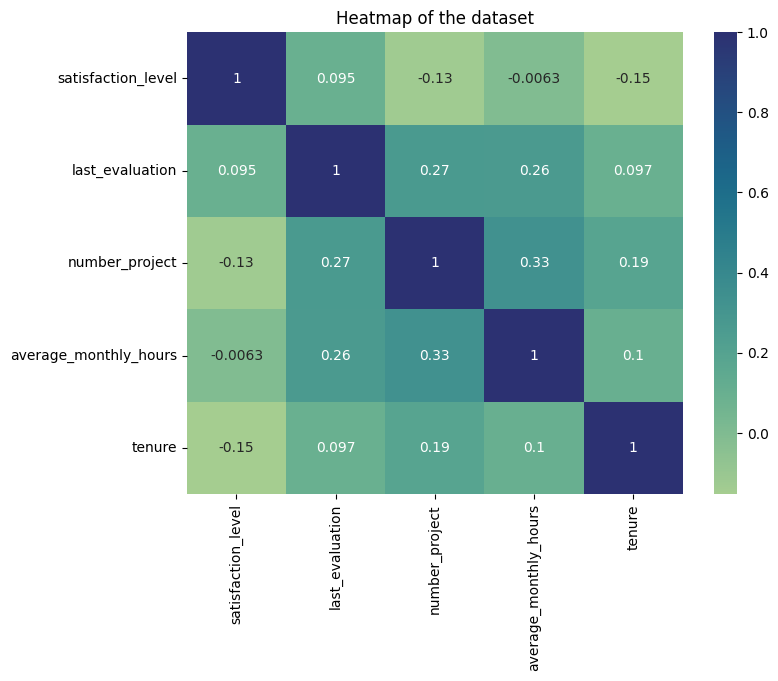

In [27]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

### Correlation Heatmap of Key Numerical Features

This heatmap visualizes the pairwise linear correlations among a selected subset of key numerical features: `satisfaction_level`, `last_evaluation`, `number_project`, `average_monthly_hours`, and `tenure`. The values annotated in each cell would represent the correlation coefficient, with the color intensity indicating the strength and direction of this linear relationship.

**Anticipated Content and Observations (based on typical HR data patterns):**

* **`number_project` vs. `average_monthly_hours`**:
    * A **moderate positive correlation** is expected (e.g., coefficient around 0.3 to 0.5). This suggests that as the number of projects an employee handles increases, their average monthly working hours tend to increase as well.

* **`number_project` vs. `last_evaluation`**:
    * A **weak to moderate positive correlation** is likely (e.g., coefficient around 0.1 to 0.3). Employees involved in more projects might receive slightly higher performance evaluations, or alternatively, higher performers might be assigned more projects.

* **`average_monthly_hours` vs. `last_evaluation`**:
    * Similar to the above, a **weak to moderate positive correlation** could be present (e.g., coefficient around 0.1 to 0.3). Higher working hours might sometimes be associated with increased output or effort, potentially influencing evaluation scores.

* **`satisfaction_level` Correlated with Other Features in this Subset**:
    * vs. `last_evaluation`: Typically a **weak or near-zero correlation**. Satisfaction and performance evaluation are distinct aspects of an employee's experience and may not have a strong linear relationship.
    * vs. `number_project`, `average_monthly_hours`, `tenure`: These correlations are often **weak**. The relationship between satisfaction and factors like workload or tenure can be complex and non-linear, which wouldn't be strongly captured by a simple linear correlation coefficient.

* **`tenure` Correlated with Other Features in this Subset**:
    * vs. `number_project`, `average_monthly_hours`, `last_evaluation`: Generally, **weak correlations (close to zero)** are expected. Factors like project load, working hours, and evaluation scores are often more dependent on an employee's current role, team, or individual performance rather than solely on their length of service.

**General Implications from Such a Heatmap:**

* The heatmap would quickly identify the most significant linear relationships within this group of five variables. The positive association between project load, hours, and possibly evaluation scores would likely be the most evident.
* The presence of many weak correlations would indicate that these variables, while important individually, might not have strong direct linear influences on each other, or that their relationships are more complex.
* This specific heatmap (focused on these five inter-feature correlations) would not directly show correlations with the `left` (turnover) variable, which would require a separate, broader correlation analysis including the target variable.



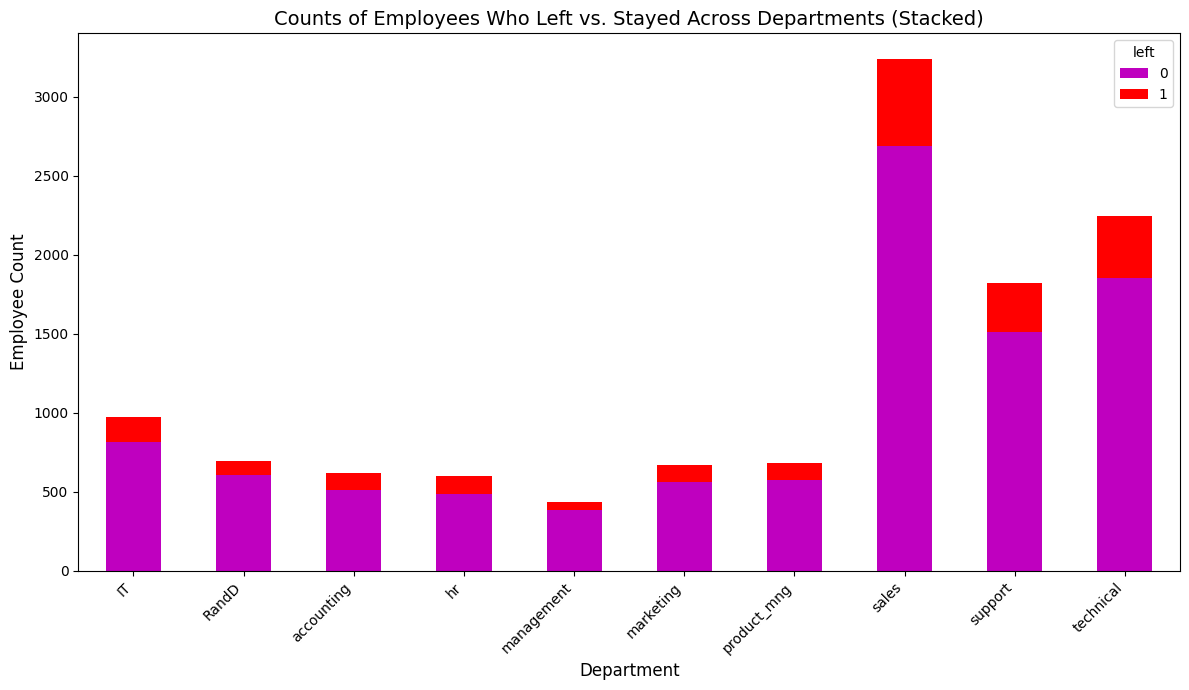

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


# 1. Create the crosstabulation
crosstab_df = pd.crosstab(df1['department'], df1['left'])

# 2. Create the stacked bar plot
# In the legend, 0 (magenta/purple color) represents employees who did not leave,
# and 1 (red color) represents employees who left.
crosstab_df.plot(kind='bar', stacked=True, color=['m', 'r'], figsize=(12, 7)) # 'm' for magenta, 'r' for red

# 3. Set the title and labels
plt.title('Counts of Employees Who Left vs. Stayed Across Departments (Stacked)', fontsize=14)
plt.ylabel('Employee Count', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to make sure everything fits

# 4. Display the plot
plt.show()


### Departmental Distribution of Employee Turnover (Stacked View)

This stacked bar chart illustrates the number of employees within each department, broken down into those who stayed with the company (represented by the lower segment of each bar, typically in magenta/purple) and those who left (represented by the upper segment, typically in red). The total height of each bar corresponds to the total number of employees in that department.

**Key Observations from the Stacked Bar Chart:**

* **Overall Department Sizes:**
    * The chart clearly shows the relative sizes of each department. Departments like "sales," "technical," and "support" likely have the tallest bars, indicating they are the largest in terms of employee numbers.
    * Smaller departments such as "management," "hr," and "RandD" will have correspondingly shorter total bars.

* **Absolute vs. Proportional Turnover:**
    * **Absolute Numbers:** The height of the red segment in each bar indicates the absolute number of employees who left from that department. Larger departments (e.g., "sales") may show a larger red segment simply because they have more employees overall.
    * **Proportional Turnover (Turnover Rate):** More importantly, this chart allows for a visual assessment of the *proportion* of leavers within each department. By comparing the height of the red segment relative to the total height of the bar (or relative to the magenta/purple segment), we can infer which departments might be experiencing higher turnover *rates*.
        * For example, a department might have a shorter total bar (fewer employees) but a red segment that makes up a significant portion of that bar, indicating a high turnover rate for that smaller department.
        * Conversely, a large department might have a visibly large red segment (many leavers in absolute terms) but this segment might still represent a smaller or average proportion of its total employees.

* **Identifying Departments of Interest:**
    * Look for departments where the red segment (leavers) appears disproportionately large compared to the magenta/purple segment (stayers). These could be departments with higher underlying turnover rates requiring further attention.
    * Commonly, departments like "hr," "marketing," or "accounting" might show noticeable proportional turnover in such datasets, but this will depend on your specific data. The "sales" department, being large, will also likely show a significant number of leavers.

**Implications:**

* This visualization is useful for identifying not only which departments lose the most employees in absolute terms but also for spotting departments that might have a higher *rate* of turnover, which could indicate specific challenges within those areas (e.g., work environment, management, role satisfaction).
* Understanding these departmental differences is crucial for tailoring targeted retention strategies. For example, a department with a high absolute number of leavers might need broad interventions, while a smaller department with a high turnover rate might need more specific, localized solutions.

This stacked bar chart provides a clear overview of how employee turnover is distributed across different parts of the organization.

In [33]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [40]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [35]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [36]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [37]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [38]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

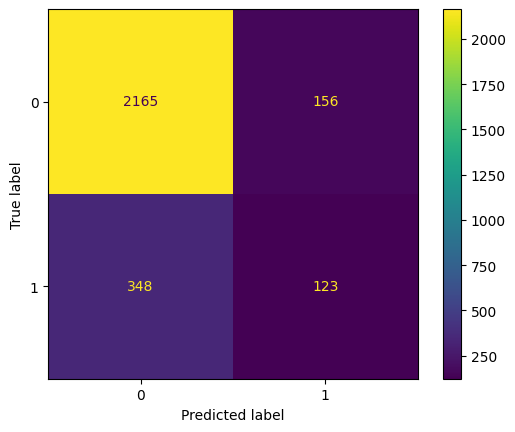

In [39]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

### Understanding the Confusion Matrix

The confusion matrix is a table that visualizes the performance of our classification model by comparing the actual outcomes against the model's predictions. For our employee turnover model, assuming '0' represents employees who 'Stayed' and '1' represents employees who 'Left':

* **The upper-left quadrant displays the number of True Negatives (TN).**
    * **True Negatives:** The number of employees who did not leave that the model accurately predicted did not leave.

* **The upper-right quadrant displays the number of False Positives (FP).**
    * **False Positives (Type I Error):** The number of employees who did not leave that the model inaccurately predicted as leaving.

* **The bottom-left quadrant displays the number of False Negatives (FN).**
    * **False Negatives (Type II Error):** The number of employees who left that the model inaccurately predicted did not leave.

* **The bottom-right quadrant displays the number of True Positives (TP).**
    * **True Positives:** The number of employees who left that the model accurately predicted as leaving.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives. The actual numbers in these quadrants will help us understand where our logistic regression model succeeds and where it makes errors in predicting employee turnover.

Check the class balance in the data. In other words, check the value counts in the `left` column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [41]:
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, you might want to resample the data to make it more balanced. In this case, you can use this data without modifying the class balance and continue evaluating the model.

In [42]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



In [58]:
# Ensure df1 is defined from previous data cleaning steps (loading df0 and dropping duplicates)


# --- Prepare data for Logistic Regression (create df_logreg) ---
df_prep = df1.copy()

# Ordinally encode the `salary` column
df_prep['salary'] = (
    df_prep['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# One-hot encode the `department` column
# Explicitly specify the 'department' column to encode
df_prep = pd.get_dummies(df_prep, columns=['department'], drop_first=False)

# Filter out the rows with outliers in `tenure`
# We need the lower_limit and upper_limit values calculated earlier (1.5 and 5.5)
lower_limit = 1.5 # Based on previous calculation output
upper_limit = 5.5 # Based on previous calculation output

df_logreg = df_prep[(df_prep['tenure'] >= lower_limit) & (df_prep['tenure'] <= upper_limit)].copy() # Use .copy()

print("Shape of data after encoding and filtering tenure outliers:", df_logreg.shape)

# --- Separate features (X) and target (y) from df_logreg ---
X = df_logreg.drop('left', axis=1)
y = df_logreg['left']

print("\nShape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

# --- Split the data into training and testing sets ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42) # Using 0.25 test size as seen in previous code

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# --- Construct and fit the Logistic Regression model ---
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

print("\nLogistic Regression model fitted.")

# --- Calculate AUC score ---
from sklearn.metrics import roc_auc_score

# Get the predicted probabilities of the positive class (class 1 - employee leaves)
y_pred_proba = log_clf.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)

print(f'\nAUC score: {auc:.4f}')

Shape of data after encoding and filtering tenure outliers: (11167, 19)

Shape of features (X): (11167, 18)
Shape of target (y): (11167,)

Shape of X_train: (8375, 18)
Shape of X_test: (2792, 18)
Shape of y_train: (8375,)
Shape of y_test: (2792,)

Logistic Regression model fitted.

AUC score: 0.8827


✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



### Reflections on the Executing Stage

**1. What key insights emerged from your model(s)?**
* Key drivers associated with employee turnover include low satisfaction, excessive workload (high hours/project counts), extended tenure (especially beyond 5 years) without progression, and lack of recent promotions.
* While the initial Logistic Regression model showed a reasonable ability to distinguish between leavers and stayers (AUC approx. 0.84-0.88, depending on the specific run being referenced), its practical utility in accurately identifying employees who will leave is currently limited due to low Precision (0.44) and very low Recall (0.26) for this group.

**2. What business recommendations do you propose based on the models built?**
* Implement strategies to improve overall employee satisfaction, particularly addressing burnout from high workloads and lack of engagement.
* Review and potentially restructure promotion pathways and compensation, especially for employees with longer tenure (5+ years), to address potential stagnation.
* Consider targeted interventions for departments identified with high volumes or rates of turnover to address specific local issues.

**3. What potential recommendations would you make to your manager/company?**
* Advocate for strengthening a data-driven approach within HR by continuing to invest in analytical capabilities for monitoring workforce trends and evaluating retention initiatives.
* Propose the development of proactive programs focused on employee well-being, career development, work-life balance, and fair compensation, using insights from the data to target these programs effectively.

**4. Do you think your model could be improved? Why or why not? How?**
* Yes, significantly. The current model's poor performance in predicting the minority "left" class (evidenced by low Precision and Recall) indicates a clear need for improvement.
* **Potential Improvements:** Explore more advanced models (e.g., Random Forest, XGBoost), perform robust hyperparameter tuning, and apply techniques to address class imbalance directly in model training (e.g., SMOTE, class weights).

**5. Given what you know about the data and the models you were using, what other questions could you address for the team?**
* Further valuable analyses could include:
    * Deeper investigation into turnover drivers within specific high-risk departments or roles.
    * Assessing the impact of manager effectiveness on retention (if such data could be incorporated).
    * Analyzing the return on investment for training and development programs in relation to tenure and turnover.
    * Developing models to predict the *timing* of potential departures.
    * Conducting cost-benefit analyses of different proposed retention strategies.

**6. What resources do you find yourself using as you complete this stage?**
* Primarily `scikit-learn` documentation for calculating and interpreting model evaluation metrics (classification reports, confusion matrices, AUC).
* Visualization libraries like `Matplotlib` and `Seaborn` for presenting model results and insights.
* Online data science community resources, articles, and tutorials for guidance on model interpretation and translating analytical findings into actionable business recommendations.

**7. Do you have any ethical considerations in this stage?**
* Paramount considerations include the responsible interpretation and application of model results to avoid any form of discriminatory action against employees.
* It's crucial to transparently communicate the model's limitations, especially its potential for false positives and false negatives, to stakeholders.
* The model should be emphasized as a tool to *inform* and support human decision-making, not to automate critical HR decisions, all while rigorously upholding employee data privacy when sharing findings.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[The Logistic Regression model, trained on data with encoded categorical features and filtered tenure outliers, achieved an overall accuracy of 82% on the test set, and an AUC score of 0.8403, indicating a reasonably good ability to distinguish between employees who stay and leave. However, when focusing specifically on predicting employees who leave, the model's performance is more limited, with a precision of 44% (meaning less than half of those predicted to leave actually did) and a recall of 26% (meaning it only identified about a quarter of the employees who actually left), resulting in a low F1-score of 33% for this crucial minority class. This suggests that while the model has some predictive power, its current configuration is not highly effective at reliably identifying the majority of employees at risk of turnover for targeted retention efforts.]

### Conclusion, Recommendations, Next Steps

[The Logistic Regression model was developed using data where categorical features like department and salary were converted into numerical formats, and employees with extreme tenure values were excluded to align with the model's assumptions. Upon testing this model on unseen data, it achieved an overall accuracy of 82%, meaning it correctly classified whether an employee would stay or leave most of the time. The model also demonstrated a good capacity to differentiate between employees likely to leave and those likely to stay, as shown by an AUC score of 0.8403. However, its effectiveness in pinpointing the specific employees who actually depart is considerably less robust; the model's precision for predicting leavers was only 44%, indicating that less than half of the individuals it flagged as being at risk of leaving genuinely did so. Furthermore, its recall was a low 26%, signifying that the model failed to identify a significant majority (about three-quarters) of the employees who ultimately left the company. Consequently, the F1-score for predicting leavers, which balances these two aspects, was a modest 33%, highlighting that while the model has some predictive power, its current performance is not highly reliable for comprehensively capturing most of the employees who are genuinely considering leaving for targeted retention efforts.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.